In [1]:
from typing import Union, List
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def walk(atoms: int,
         timesteps: np.ndarray,
         jump_size: int = 1,
         seed: np.random.mtrand.RandomState = np.random.RandomState()) -> np.ndarray:
    """
    Perform a random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices[i, j]]
    cum_steps = np.cumsum(steps, axis=1)
    return cum_steps

In [3]:
# Copyright (c) Andrew R. McCluskey
# Distributed under the terms of the MIT License
# author: Andrew R. McCluskey (arm61)

import numpy as np
from tqdm import tqdm
#from random_walk import walk

jump = 1
atoms = 124
length = 128
size = 2000

std_est = np.zeros((length,size))
sqr_est = np.zeros((length,size))
std_non_abs = np.zeros((length,size))

timestep = np.arange(1, length + 1, 1, dtype=int)
k = np.zeros((size, timestep.size))
k_non_abs = np.zeros((size, timestep.size))
k2 = np.zeros((size, timestep.size))
mean_disp = np.zeros((length,3,size))
MSD = np.zeros((length,3,size))


for seed in tqdm(range(size)):

    disp_3d = []
    rng = np.random.RandomState(seed + 4000)
    cum_steps = walk(atoms, timestep, seed=rng, jump_size=jump)

    for i, n in enumerate(timestep):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                               np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                              axis=1)
        
        d_x = np.tensordot(np.array((1,1,1)),disp, axes=[[0],[2]]) #np.abs(disp[:,:,0])
        d_abs = np.tensordot(np.array((1,1,1)),np.abs(disp), axes=[[0],[2]])

        
        k[seed, i] = np.mean(d_abs.flatten())
        k_non_abs[seed,i] = np.mean(d_x.flatten())
        k2[seed, i] = np.mean((d_x**2).flatten())

        std_est[i,seed] = np.var(d_abs)/(timestep[-1]/timestep[i]*124)
        std_non_abs[i,seed] = np.var((d_x))/(timestep[-1]/timestep[i]*124)
        sqr_est[i,seed] = np.var(d_x**2)/(timestep[-1]/timestep[i]*124)

        disp_3d.append(disp)

    for x in range(length):
        mean_disp[x,:,seed] = np.mean(np.sqrt(disp_3d[x]**2),axis = (0,1))
        MSD[x,:,seed] = np.mean(disp_3d[x]**2,axis = (0,1))

std_num = k.var(0)
non_abs = k_non_abs.var(0)
sqr_num = k2.var(0)

100%|██████████| 2000/2000 [05:30<00:00,  6.05it/s]


In [4]:
np.tensordot(np.array((1,1,1)),disp[10:12], axes = [[0],[2]])

array([[10.],
       [-2.]])

In [5]:
disp[10:12]

array([[[ 3., -6., 13.]],

       [[-2.,  5., -5.]]])

In [6]:
len(disp_3d)

128

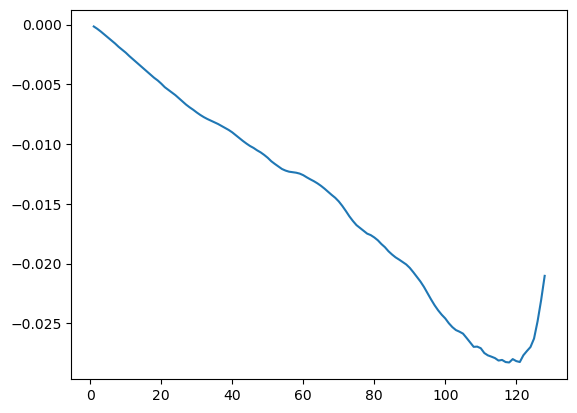

In [7]:
plt.plot(timestep,k_non_abs.mean(0))

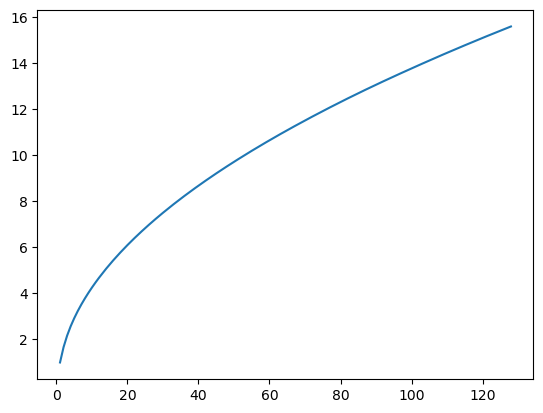

In [8]:
plt.plot(timestep,k.mean(0))

In [9]:
np.mean(k,axis = 0)

array([ 1.        ,  1.66677407,  2.16663319,  2.57395148,  2.92426294,
        3.23626731,  3.52008871,  3.78245121,  4.02765726,  4.25869009,
        4.47758311,  4.68633892,  4.88608155,  5.07805379,  5.26302405,
        5.44166136,  5.61453982,  5.78223336,  5.94527969,  6.10403685,
        6.25879032,  6.40965006,  6.55699224,  6.70102235,  6.84215547,
        6.98034889,  7.11589753,  7.2488122 ,  7.37933758,  7.50759001,
        7.633849  ,  7.75806851,  7.88022312,  8.00037572,  8.11871911,
        8.2352291 ,  8.3501719 ,  8.46346384,  8.57539256,  8.68580618,
        8.79483605,  8.90252447,  9.00900234,  9.11420892,  9.21826382,
        9.32108356,  9.42283635,  9.52344634,  9.62306331,  9.72154808,
        9.81917794,  9.91589558, 10.01163763, 10.10653215, 10.20050708,
       10.29356927, 10.3858078 , 10.47726726, 10.56787869, 10.65779663,
       10.74703546, 10.83538481, 10.92306134, 11.0100273 , 11.09631477,
       11.18190195, 11.26683858, 11.35122885, 11.43506371, 11.51

In [10]:
np.mean((np.tensordot(np.array((1,1,1)),disp, axes=[[0],[2]])))

0.9032258064516129

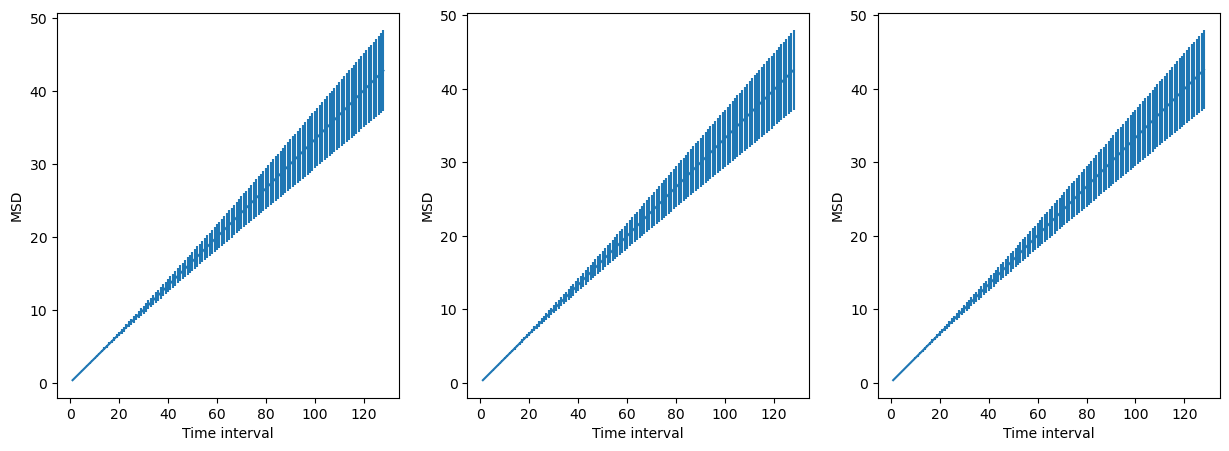

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for x in range(3):
    ax[x].errorbar(timestep,np.mean(MSD[:,x,:],axis=1), yerr = np.std(MSD[:,x,:],axis=1))
    ax[x].set_xlabel('Time interval')
    ax[x].set_ylabel('MSD')

#ax[0].plot(timestep,k2.mean(axis=0), color = 'orange')

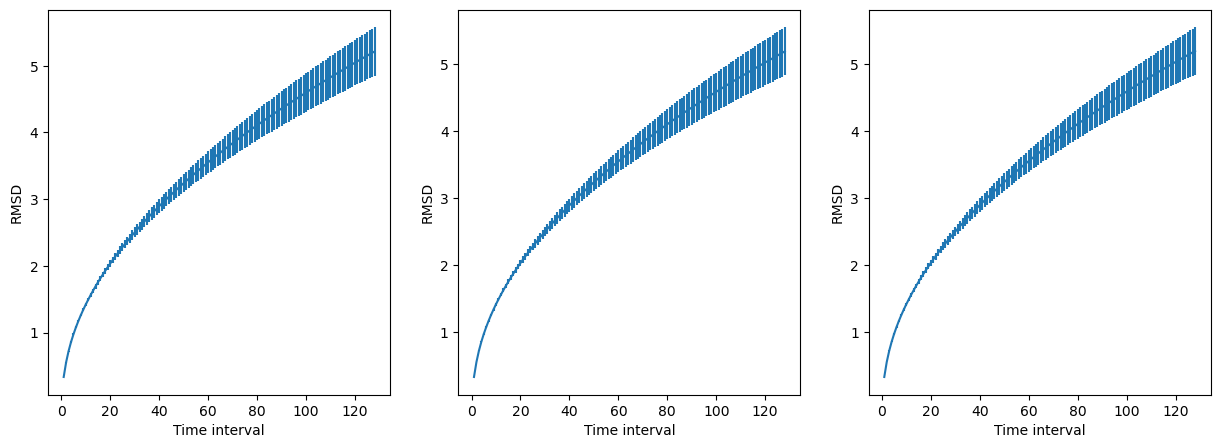

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for x in range(3):
    ax[x].errorbar(timestep,np.mean(mean_disp[:,x,:],axis=1), yerr = np.std(mean_disp[:,x,:],axis=1))
    ax[x].set_xlabel('Time interval')
    ax[x].set_ylabel('RMSD')


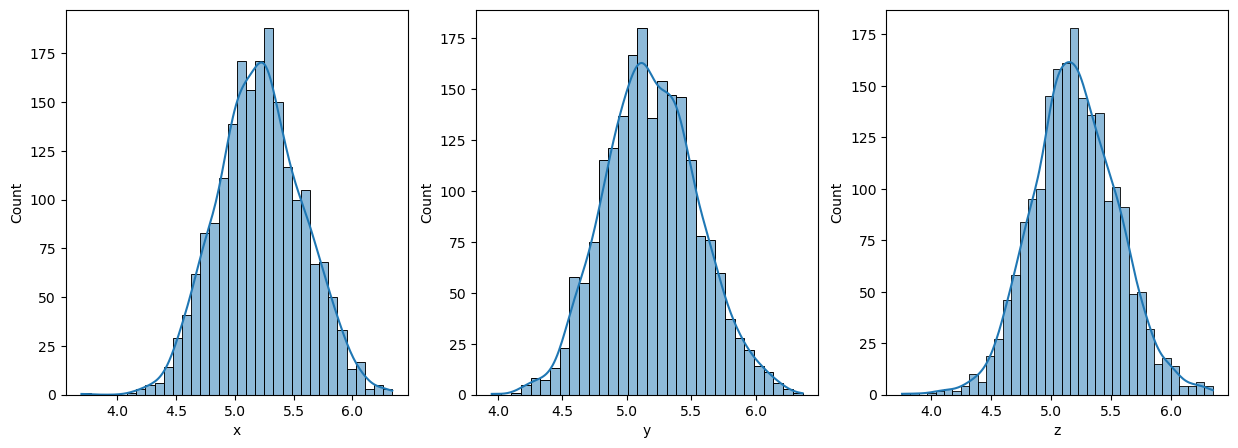

In [13]:
# RMSD


fig, ax = plt.subplots(1,3, figsize=(15,5))
df_md = pd.DataFrame(mean_disp[-1].T, columns = ['x','y','z'])

for x in range(3):
   sns.histplot(df_md, x=df_md.columns[x], ax = ax[x], kde = True)

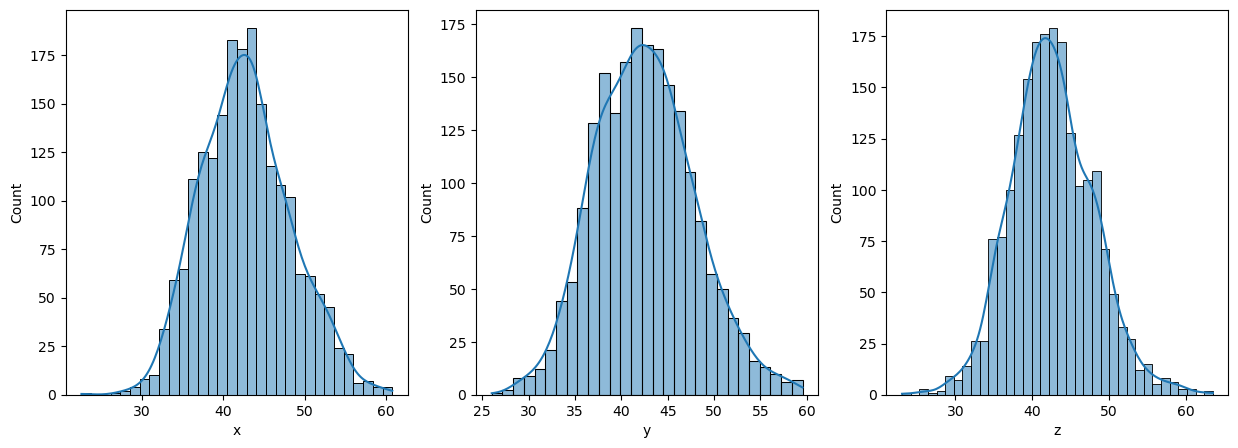

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

df_msd = pd.DataFrame(MSD[-1].T, columns = ['x', 'y', 'z'])

for x in range(3):
   sns.histplot(df_msd, x=df_msd.columns[x], ax = ax[x], kde = True)

In [15]:
sqr_est.shape

(128, 2000)

In [16]:
k.shape

(2000, 128)

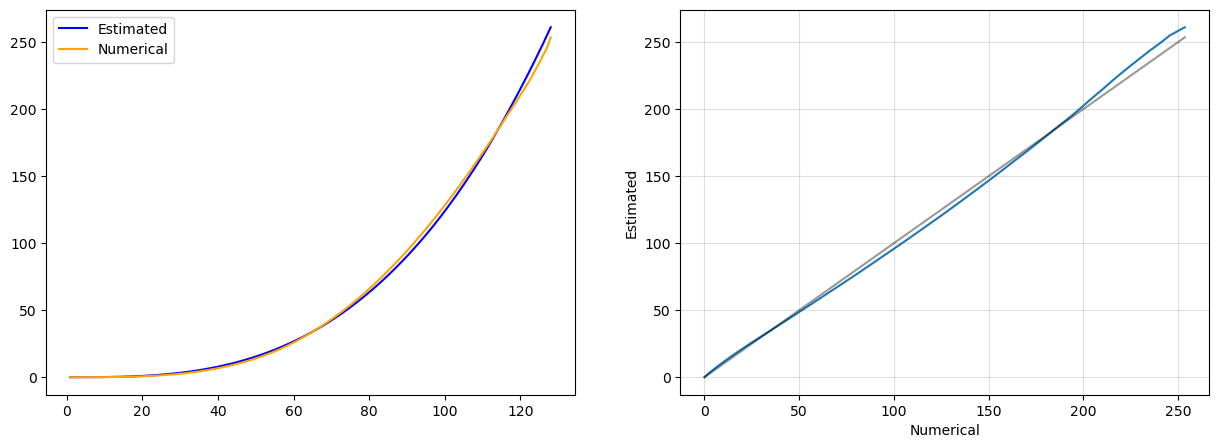

In [17]:
# Variance of overlapping samples, decorrelating overlapping samples

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(timestep,np.mean(sqr_est,axis = 1), color = 'blue')
ax[0].plot(timestep,sqr_num, color = 'orange')
ax[0].legend(['Estimated', 'Numerical'])

#ax[1].plot(timestep,sqr_num/np.mean(sqr_est,axis = 1))
ax[1].plot(sqr_num,np.mean(sqr_est,axis = 1))
ax[1].set_xlabel('Numerical')
ax[1].set_ylabel('Estimated')
ax[1].plot(np.linspace(0,np.max(sqr_num),100),np.linspace(0,np.max(sqr_num),100), c = 'k', alpha = 0.4)
ax[1].grid(alpha = 0.4)

In [18]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))

# ax[0].plot(timestep,np.sqrt(np.mean(sqr_est,axis = 1)), color = 'blue')
# ax[0].plot(timestep,np.sqrt(sqr_num), color = 'orange')
# ax[0].legend(['Estimated', 'Numerical'])

# #ax[1].plot(timestep,sqr_num/np.mean(sqr_est,axis = 1))
# ax[1].plot(np.sqrt(sqr_num),np.sqrt(np.mean(sqr_est,axis = 1)))
# ax[1].set_xlabel('Numerical')
# ax[1].set_ylabel('Estimated')
# ax[1].plot(np.linspace(0,5,100),np.linspace(0,5,100), c = 'k', alpha = 0.4)
# ax[1].grid(alpha = 0.4)


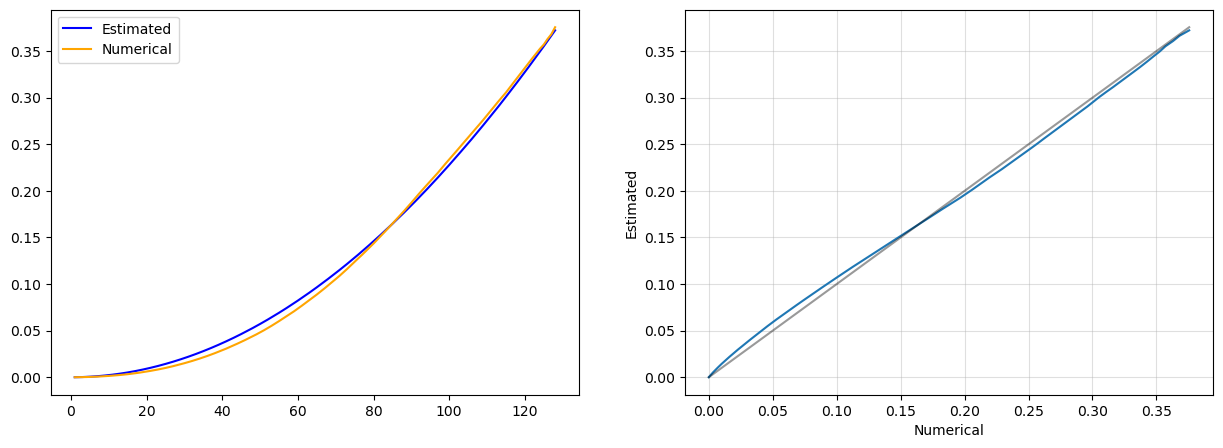

In [19]:
# Variance of overlapping samples, decorrelating overlapping samples


# absolute displacement

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(timestep,np.mean(std_est,axis = 1), color = 'blue')
ax[0].plot(timestep,std_num, color = 'orange')
ax[0].legend(['Estimated', 'Numerical'])

# ax[1].plot(timestep,std_num/np.mean(std_est,axis = 1))
# ax[1].grid(alpha = 0.4)

ax[1].plot(std_num,np.mean(std_est,axis = 1))
ax[1].set_xlabel('Numerical')
ax[1].set_ylabel('Estimated')
ax[1].plot(np.linspace(0,np.max(std_num),100),np.linspace(0,np.max(std_num),100), c = 'k', alpha = 0.4)
ax[1].grid(alpha = 0.4)

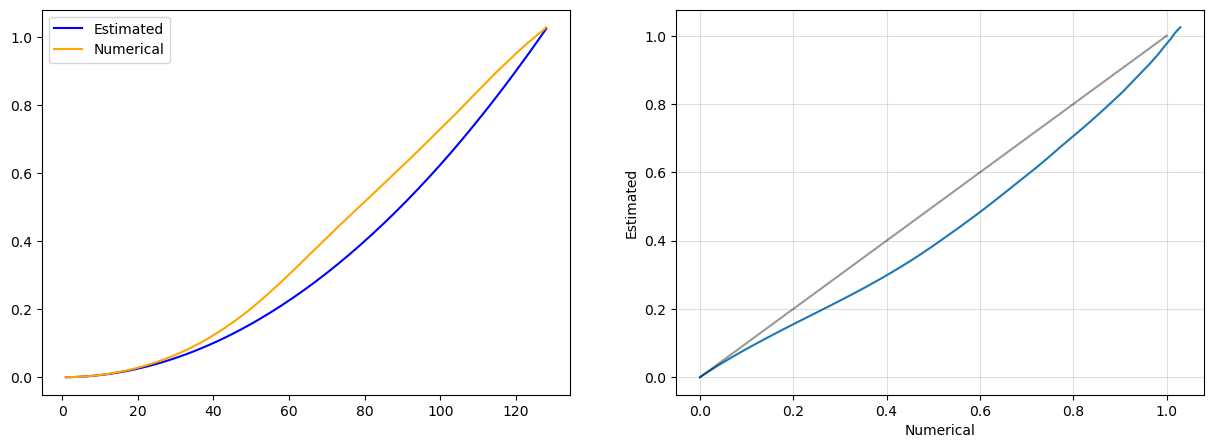

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(timestep,np.mean(std_non_abs,axis = 1), color = 'blue')
ax[0].plot(timestep,non_abs, color = 'orange')
ax[0].legend(['Estimated', 'Numerical'])

# ax[1].plot(timestep,std_num/np.mean(std_est,axis = 1))
# ax[1].grid(alpha = 0.4)

ax[1].plot(non_abs,np.mean(std_non_abs,axis = 1))
ax[1].set_xlabel('Numerical')
ax[1].set_ylabel('Estimated')
ax[1].plot(np.linspace(0,1,100),np.linspace(0,1,100), c = 'k', alpha = 0.4)
ax[1].grid(alpha = 0.4)

/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_47861/3190486958.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(timestep, np.mean(sqr_est,axis = 1)/sqr_num )


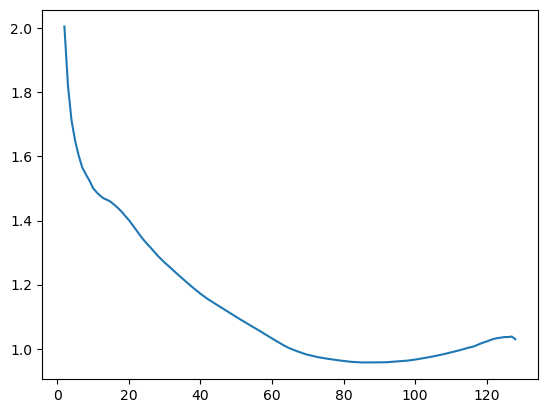

In [23]:
plt.plot(timestep, np.mean(sqr_est,axis = 1)/sqr_num )

/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_47861/3351057928.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(timestep, np.mean(std_est,axis = 1) / std_num)


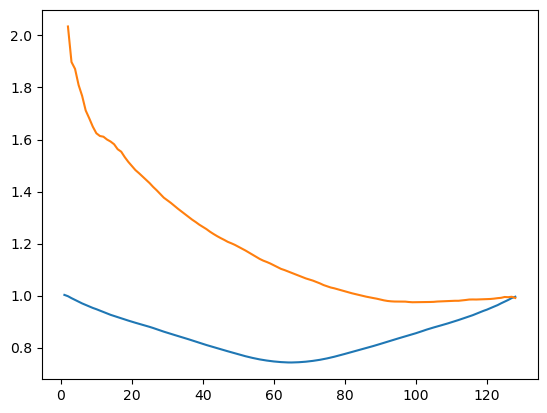

In [21]:
plt.plot(timestep, np.mean(std_non_abs,axis = 1) / non_abs)
plt.plot(timestep, np.mean(std_est,axis = 1) / std_num)

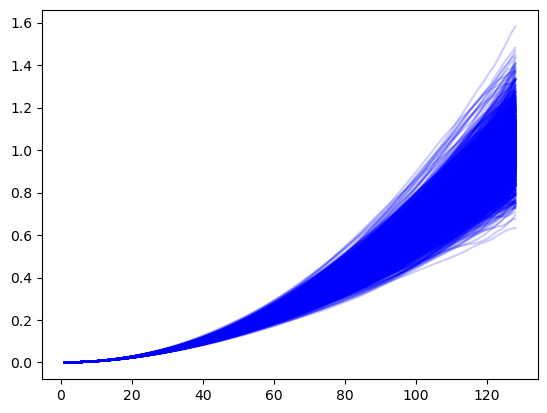

In [22]:
for x in range(2000):
    plt.plot(timestep,std_non_abs[:,x], alpha = 0.2, color = 'blue')